# 1. Introduccion
### En este cuaderno vamos a practicar haciendo dos redes neuronales convolucionales a dos dataset de imágenes:
* https://www.kaggle.com/datasets/stealthknight/bird-vs-drone/data (clasificación binaria)
* https://www.kaggle.com/datasets/imsparsh/flowers-dataset/data (clasificación multiclase)

# 2. Clasificación Binaria (Bird VS Drone)

## 2.1 Importamos el dataset

In [2]:
import kagglehub
import os

# Descargar el dataset desde KaggleHub
print("Descargando el dataset Bird vs Drone...")
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")
print("Dataset descargado en:", path)

Descargando el dataset Bird vs Drone...


100%|██████████| 1.05G/1.05G [04:49<00:00, 3.91MB/s]

Extracting files...


Dataset descargado en: /home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1


In [5]:
import os

# Mostrar la estructura de directorios
print("Estructura del directorio:")
for root, dirs, files in os.walk(path):
    print(f"\nCarpeta: {root}")
    for file in files[5:]:
        print(f"  - {file}")

Estructura del directorio:

Carpeta: /home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1

Carpeta: /home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset

Carpeta: /home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train

Carpeta: /home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images
  - DTR (1057).jpg
  - DTR (6530).jpg
  - DTR (3794).jpg
  - DTR (10089).jpg
  - BTR (1145).jpg
  - DTR (4627).jpg
  - DTR (1184).jpg
  - BTR (5050).jpg
  - DTR (5414).jpg
  - BTR (2392).jpg
  - DTR (3616).jpg
  - BTR (6527).jpg
  - DTR (2364).jpg
  - BTR (6003).jpg
  - DTR (545).jpg
  - BTR (2735).jpg
  - DTR (734).jpg
  - DTR (4133).jpg
  - DTR (6596).jpg
  - DTR (7546).jpg
  - DTR (9426).jpg
  - BTR (6764).jpg
  - DTR (4997).jpg
  - BTR (352).jpg
  - BTR (3585).jpg
  - BTR (6692).jpg
  - BTR (5679).jpg
  - DTR (2872).jpg
  - DTR (9899).jpg
 

### dataset está organizado de esta manera (ejemplo):
* BTR (2042).jpg (para las imagenes de pajaros training)
* BV (92).jpg (para las imagenes de pajaros validacion)
* DTR (7944).jpg (para las imagenes de drones training)
* DV (1000).jpg (para las imagenes de drones validacion)

## 2.2 Definimos las rutas de la carpetas

In [20]:
# Definir rutas a las imágenes de entrenamiento y validación
train_images_path = '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images'
valid_images_path = '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/valid/images'
test_images_path = '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/test/images'

## 2.3 Obtenemos y contamos imágenes por clase

In [28]:
from glob import glob
from collections import Counter

# Obtener listas de imágenes
train_images = glob(os.path.join(train_images_path, "*.jpg"))
valid_images = glob(os.path.join(valid_images_path, "*.jpg"))
test_images = glob(os.path.join(test_images_path, "*.jpg"))
# Verificar las primeras imágenes para asegurarnos de que las rutas y nombres son correctos
print("Primeras imágenes de entrenamiento:")
print(train_images[:5])  # Mostrar las primeras 5 imágenes de entrenamiento
print("Primeras imágenes de validación:")
print(valid_images[:5])  # Mostrar las primeras 5 imágenes de validación
print("Primeras imágenes de test:")
print(test_images[:5])  # Mostrar las primeras 5 imágenes de test

# Función para asignar etiquetas según el nombre del archivo
def asignar_etiqueta(imagen):
    if 'BTR' in imagen:  # Pájaro en entrenamiento
        return 'pajaro'
    elif 'DTR' in imagen:  # Dron en entrenamiento
        return 'dron'
    elif 'BV' in imagen:  # Pájaro en validación
        return 'pajaro'
    elif 'DV' in imagen:  # Dron en validación
        return 'dron'
    elif 'BT' in imagen:  # Pájaro en test
        return 'pajaro'
    elif 'DT' in imagen:  # Dron en test
        return 'dron'
    else:
        return None  # Eliminamos cualquier archivo sin etiqueta válida

# Asignar etiquetas
train_labels = [asignar_etiqueta(img) for img in train_images]
valid_labels = [asignar_etiqueta(img) for img in valid_images]
test_labels = [asignar_etiqueta(img) for img in test_images]

# Eliminar cualquier imagen que no haya sido etiquetada correctamente
train_images = [img for img, label in zip(train_images, train_labels) if label is not None]
train_labels = [label for label in train_labels if label is not None]
test_images = [img for img, label in zip(test_images, test_labels) if label is not None]
test_labels = [label for label in test_labels if label is not None]

valid_images = [img for img, label in zip(valid_images, valid_labels) if label is not None]
valid_labels = [label for label in valid_labels if label is not None]

# Contar la cantidad de imágenes por clase
contador_train = Counter(train_labels)
contador_valid = Counter(valid_labels)
contador_test = Counter(test_labels)

# Verificar la cantidad de imágenes por clase
print("Cantidad de imágenes por clase (Entrenamiento):", contador_train)
print("Cantidad de imágenes por clase (Validación):", contador_valid)
print("Cantidad de imágenes por clase (Test):", contador_test)

Primeras imágenes de entrenamiento:
['/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images/BTR (7001).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images/DTR (7626).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images/DTR (10006).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images/DTR (9323).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images/DTR (3688).jpg']
Primeras imágenes de validación:
['/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/valid/images/DV (967).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/valid/images/DV (684).jpg', '/home/alumnadotarde/.cache/kagglehub/datasets/stealthknight/bir

## 2.4 Mostramos algunas imágenes aleatorias de entrenamiento y validación

Imágenes de Dron disponibles: 1039
Imágenes de Pájaro disponibles: 701


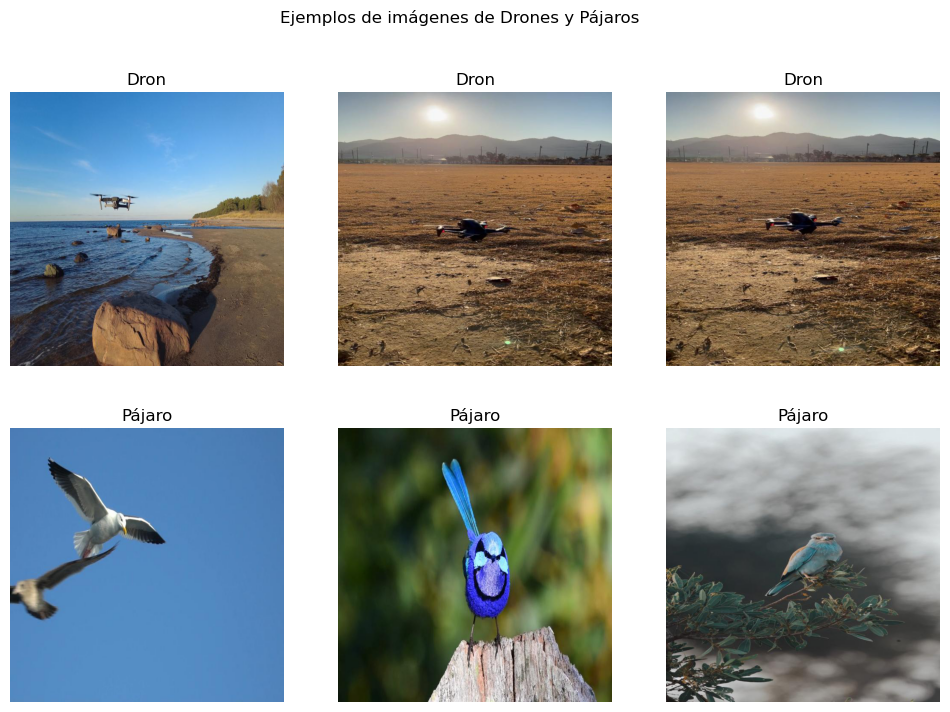

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Función para mostrar imágenes de cada clase (dron y pájaro)
def mostrar_imagenes_por_clase(imagenes, etiquetas, n=5):
    # Filtrar imágenes de cada clase
    drones = [img for img, etiqueta in zip(imagenes, etiquetas) if etiqueta == 'dron']
    pajaros = [img for img, etiqueta in zip(imagenes, etiquetas) if etiqueta == 'pajaro']

    # Mostrar cuántas imágenes hay de cada clase
    print(f"Imágenes de Dron disponibles: {len(drones)}")
    print(f"Imágenes de Pájaro disponibles: {len(pajaros)}")

    # Si no hay suficientes imágenes, mostrar todas las que haya
    seleccion_drones = random.sample(drones, min(len(drones), n))
    seleccion_pajaros = random.sample(pajaros, min(len(pajaros), n))

    # Mostrar las imágenes de drones y pájaros
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(seleccion_drones):
        img = mpimg.imread(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Dron")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros):
        img = mpimg.imread(img_path)
        plt.subplot(2, 3, i + 4)
        plt.imshow(img)
        plt.title(f"Pájaro")
        plt.axis('off')

    plt.suptitle(f"Ejemplos de imágenes de Drones y Pájaros")
    plt.show()

# Mostrar 3 imágenes de cada clase en las imágenes de validación
mostrar_imagenes_por_clase(valid_images, valid_labels, n=3)

## 2.5 Modelo de Red Neuronal Convolucional (CNN)

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Función para cargar y preprocesar las imágenes (escala de grises y redimensionadas)
def cargar_imagenes_grises(lista_imagenes, img_size=(100, 100)):
    imagenes = []
    for img_path in lista_imagenes:
        img = image.load_img(img_path, target_size=img_size, color_mode='grayscale')  # Convertir a blanco y negro
        img_array = image.img_to_array(img)  # Convertir imagen a array de numpy
        imagenes.append(img_array)
    return np.array(imagenes)

# Cargar las imágenes de entrenamiento y validación en escala de grises
train_images_array = cargar_imagenes_grises(train_images)
valid_images_array = cargar_imagenes_grises(valid_images)

# Normalizar las imágenes (los valores de píxeles deben estar entre 0 y 1)
train_images_array = train_images_array / 255.0
valid_images_array = valid_images_array / 255.0

# Asegurarse de que las imágenes tengan el tamaño correcto (224, 224, 1)
train_images_array = train_images_array.reshape((-1, 100, 100, 1))
valid_images_array = valid_images_array.reshape((-1, 100, 100, 1))


# Convertir las imágenes a tipo float32
train_images_array = train_images_array.astype('float32')
valid_images_array = valid_images_array.astype('float32')

# Convertir las etiquetas de texto a números (dron = 1, pajaro = 0)
def convertir_etiquetas(etiquetas):
    return [1 if etiqueta == 'dron' else 0 for etiqueta in etiquetas]

# Convertir las etiquetas de texto a números
train_labels_num = convertir_etiquetas(train_labels)
valid_labels_num = convertir_etiquetas(valid_labels)

# Asegurarse de que las etiquetas estén en formato numérico (0 o 1)
train_labels_num = np.array(train_labels_num, dtype=np.int32)
valid_labels_num = np.array(valid_labels_num, dtype=np.int32)

# Barajar las imágenes
# Barajar imágenes y etiquetas de entrenamiento juntas
indices = np.arange(len(train_images_array))
np.random.shuffle(indices)
train_images_array = train_images_array[indices]
train_labels_num = train_labels_num[indices]

# Verificar el tamaño de las imágenes cargadas
print(f'Tamaño de las imágenes de entrenamiento: {train_images_array.shape}')
print(f'Tamaño de las imágenes de validación: {valid_images_array.shape}')

Tamaño de las imágenes de entrenamiento: (18323, 100, 100, 1)
Tamaño de las imágenes de validación: (1740, 100, 100, 1)


In [45]:
import tensorflow as tf


# Crear el modelo de red neuronal convolucional
modelo = tf.keras.Sequential([

    # Primera capa convolucional (detecta características locales)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),  # Entrada con forma (224, 224, 1) para imágenes en blanco y negro
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling para reducir la dimensionalidad

    # Segunda capa convolucional
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional adicional (opcional)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar la salida de las capas convolucionales para alimentarla a una capa densa
    tf.keras.layers.Flatten(),

    # Capas densas para clasificación
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 unidad para clasificación binaria
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),  # Usar BinaryCrossentropy para clasificación binaria
    metrics=['accuracy']
)

# Resumen del modelo para verificar la estructura
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,329 (6.60 MB)

 Trainable params: 1,731,329 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [46]:
# Entrenar el modelo
historial = modelo.fit(
    train_images_array, 
    train_labels_num,  # Usar etiquetas numéricas (0 o 1)
    epochs=10,  # Número de épocas
    batch_size=32,  # Tamaño del batch
    validation_data=(valid_images_array, valid_labels_num)  # Usar las etiquetas numéricas de validación
)

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.8383 - loss: 0.3127 - val_accuracy: 0.4029 - val_loss: 2.8756
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9873 - loss: 0.0368 - val_accuracy: 0.4770 - val_loss: 2.4181
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.4931 - val_loss: 3.0533
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9951 - loss: 0.0130 - val_accuracy: 0.4466 - val_loss: 3.8259
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9955 - loss: 0.0110 - val_accuracy: 0.4448 - val_loss: 5.0869
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.4661 - val_loss: 4.2013
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.4540 - val_loss: 5.4899
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9971 - loss: 0.0067 - 

### Perdida y precision

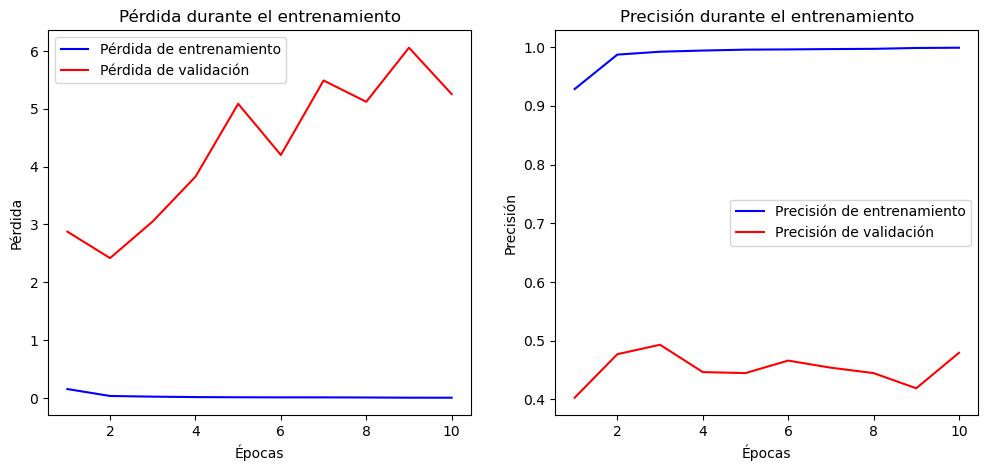

In [47]:
import matplotlib.pyplot as plt

# Obtener el rango de épocas
epochs = range(1, len(historial.history['loss']) + 1)

# Crear la figura con subgráficas
plt.figure(figsize=(12, 5))

# Gráfica de Pérdida
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera posición
plt.plot(epochs, historial.history['loss'], 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, historial.history['val_loss'], 'r', label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

# Gráfica de Precisión
plt.subplot(1, 2, 2)  # Segunda posición
plt.plot(epochs, historial.history['accuracy'], 'b', label='Precisión de entrenamiento')
plt.plot(epochs, historial.history['val_accuracy'], 'r', label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

# Mostrar las gráficas
plt.show()

# 3. Clasificación Multiclase (Flowers)

## 3.1 Importamos el dataset